In [1]:
import pickle
import matplotlib.pyplot as plt
import urbangrammar_graphics as ugg
import pandas as pd

In [2]:
c = ugg.COLORS

In [9]:
folder = "../../urbangrammar_samba/sp_sig_concept/barcelona/"

with open(folder + 'clustergram_ss.pickle','rb') as f:
    cgram = pickle.load(f)

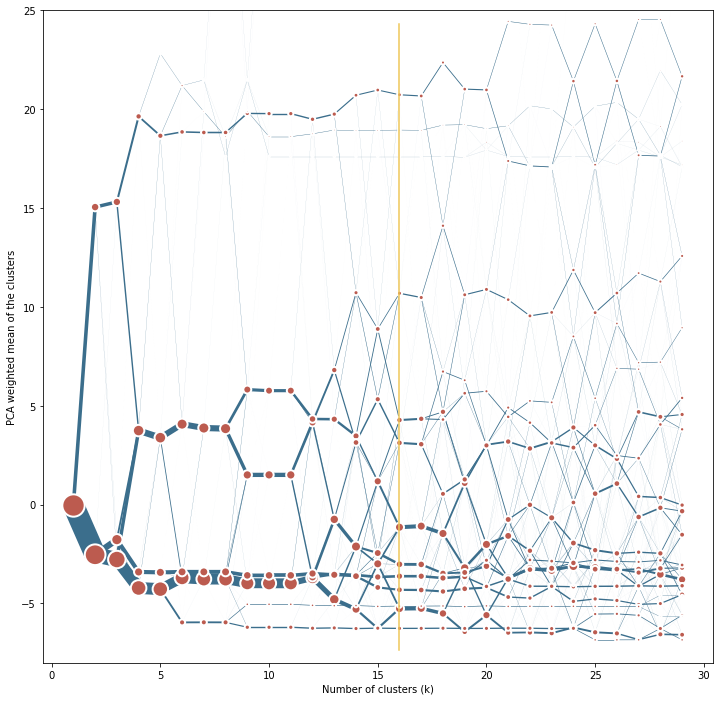

In [10]:
ax = cgram.plot(figsize=(12, 12), linewidth=0.5, cluster_style={"edgecolor": "w", "color": c[2]}, size=1,
       line_style={"color":c[1]})
ax.set_ylim(-8, 25)
ax.axvline(16, color=c[4], ymin=.02, ymax=.98)
plt.savefig(folder + "cgram.png", dpi=300)

In [11]:
folder = "../../urbangrammar_samba/sp_sig_concept/dar_es_salaam/"

with open(folder + 'clustergram_ss.pickle','rb') as f:
    cgram = pickle.load(f)

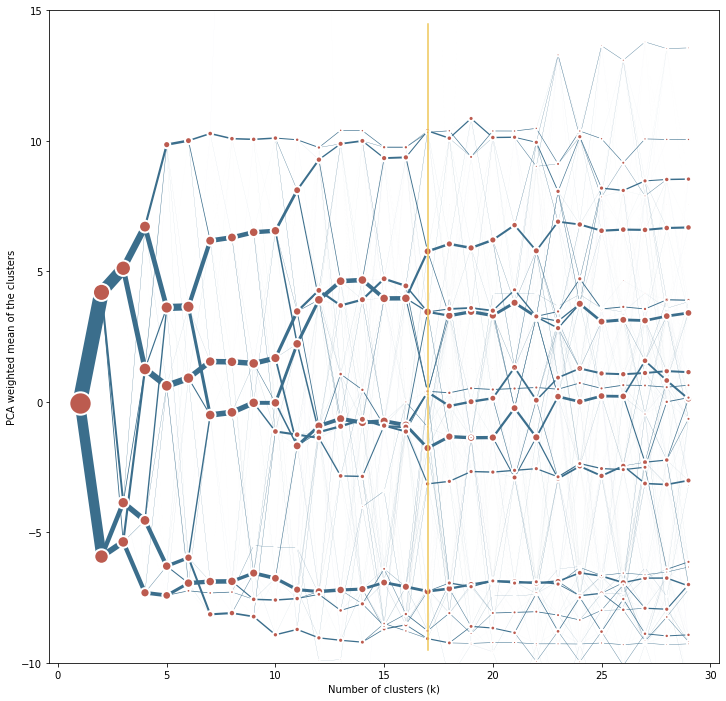

In [12]:
ax = cgram.plot(figsize=(12, 12), linewidth=0.5, cluster_style={"edgecolor": "w", "color": c[2]}, size=1,
       line_style={"color":c[1]})
ax.set_ylim(-10, 15)
ax.axvline(17, color=c[4], ymin=.02, ymax=.98)
plt.savefig(folder + "cgram.png", dpi=300)

In [7]:
folder = "../../urbangrammar_samba/sp_sig_concept/houston/"

with open(folder + 'clustergram_ss.pickle','rb') as f:
    cgram = pickle.load(f)

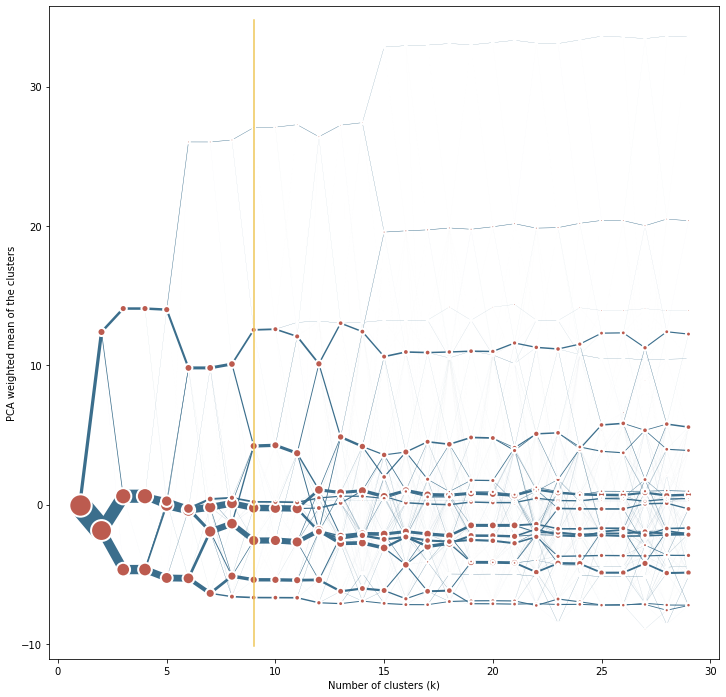

In [10]:
ax = cgram.plot(figsize=(12, 12), linewidth=0.5, cluster_style={"edgecolor": "w", "color": c[2]}, size=1,
       line_style={"color":c[1]})
# ax.set_ylim(-8, 25)
ax.axvline(9, color=c[4], ymin=.02, ymax=.98)
plt.savefig(folder + "cgram.png", dpi=300)

In [5]:
folder = "../../urbangrammar_samba/sp_sig_concept/medellin/"

with open(folder + 'clustergram_ss.pickle','rb') as f:
    cgram = pickle.load(f)

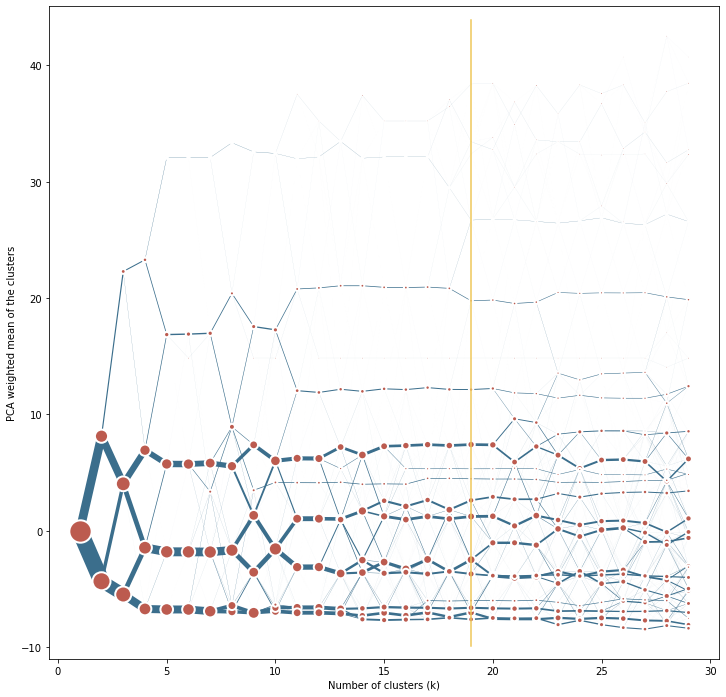

In [6]:
ax = cgram.plot(figsize=(12, 12), linewidth=0.5, cluster_style={"edgecolor": "w", "color": c[2]}, size=1,
       line_style={"color":c[1]})
# ax.set_ylim(-8, 25)
ax.axvline(19, color=c[4], ymin=.02, ymax=.98)
plt.savefig(folder + "cgram.png", dpi=300)

In [11]:
folder = "../../urbangrammar_samba/sp_sig_concept/singapore/"

with open(folder + 'clustergram_ss.pickle','rb') as f:
    cgram = pickle.load(f)

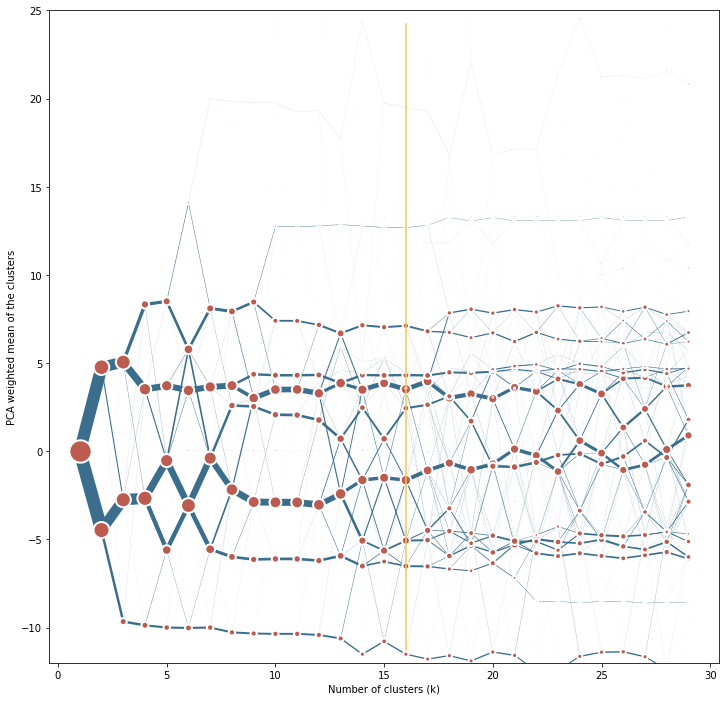

In [8]:
ax = cgram.plot(figsize=(12, 12), linewidth=0.5, cluster_style={"edgecolor": "w", "color": c[2]}, size=1,
       line_style={"color":c[1]})
ax.set_ylim(-12, 25)
ax.axvline(16, color=c[4], ymin=.02, ymax=.98)
plt.savefig(folder + "cgram.png", dpi=300)

## Figure out Singapore

In [12]:
from clustergram import Clustergram
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn import preprocessing

In [13]:
form = pd.read_parquet(folder + "convolutions.pq")
tess = gpd.read_parquet(folder + "tess.pq", columns=['tessellation', 'buildings', 'tID'])

In [14]:
form = form.replace(np.inf, np.nan)  # due to issues with small islands

Raw data needs to be standardised. We use standard scaler.

In [15]:
scaler = preprocessing.StandardScaler()
data = scaler.fit_transform(form)

Due to tiny islands, we have some missing values in the whole datasets so we just replace them with 0.

In [16]:
data[np.isnan(data)] = 0

In [17]:
function_data = pd.read_parquet(folder + "func_data_tess.pq")

We have some categorical values, so we have to encode them as boolean dummies.

In [18]:
use = pd.get_dummies(function_data.use)

Continuous values need to be standardized.

In [19]:
scaler = preprocessing.StandardScaler()
f_data = scaler.fit_transform(function_data.drop(columns=["use"]))

In [20]:
f_data.shape

(134922, 8)

We can all merge back together.

In [21]:
ss_data = np.hstack([data, f_data])

In [26]:
cg_ss = Clustergram(range(1, 30), backend='sklearn', n_init=10, random_state=1234)
cg_ss.fit(ss_data)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 2.1516671180725098 seconds.
K=3 fitted in 4.16246485710144 seconds.
K=4 fitted in 5.349292516708374 seconds.
K=5 fitted in 5.714417934417725 seconds.
K=6 fitted in 6.11185622215271 seconds.
K=7 fitted in 7.9647157192230225 seconds.
K=8 fitted in 8.020950078964233 seconds.
K=9 fitted in 10.9146249294281 seconds.
K=10 fitted in 10.808412790298462 seconds.
K=11 fitted in 14.880875825881958 seconds.
K=12 fitted in 13.819668769836426 seconds.
K=13 fitted in 17.227535247802734 seconds.
K=14 fitted in 19.25512671470642 seconds.
K=15 fitted in 14.631538391113281 seconds.
K=16 fitted in 16.243508338928223 seconds.
K=17 fitted in 16.81127166748047 seconds.
K=18 fitted in 16.412415266036987 seconds.
K=19 fitted in 18.040106534957886 seconds.
K=20 fitted in 22.19286561012268 seconds.
K=21 fitted in 21.122169256210327 seconds.
K=22 fitted in 20.904513835906982 seconds.
K=23 fitted in 24.016000986099243 seconds.
K=24 fitted in 22.397594213

(-12.0, 25.0)

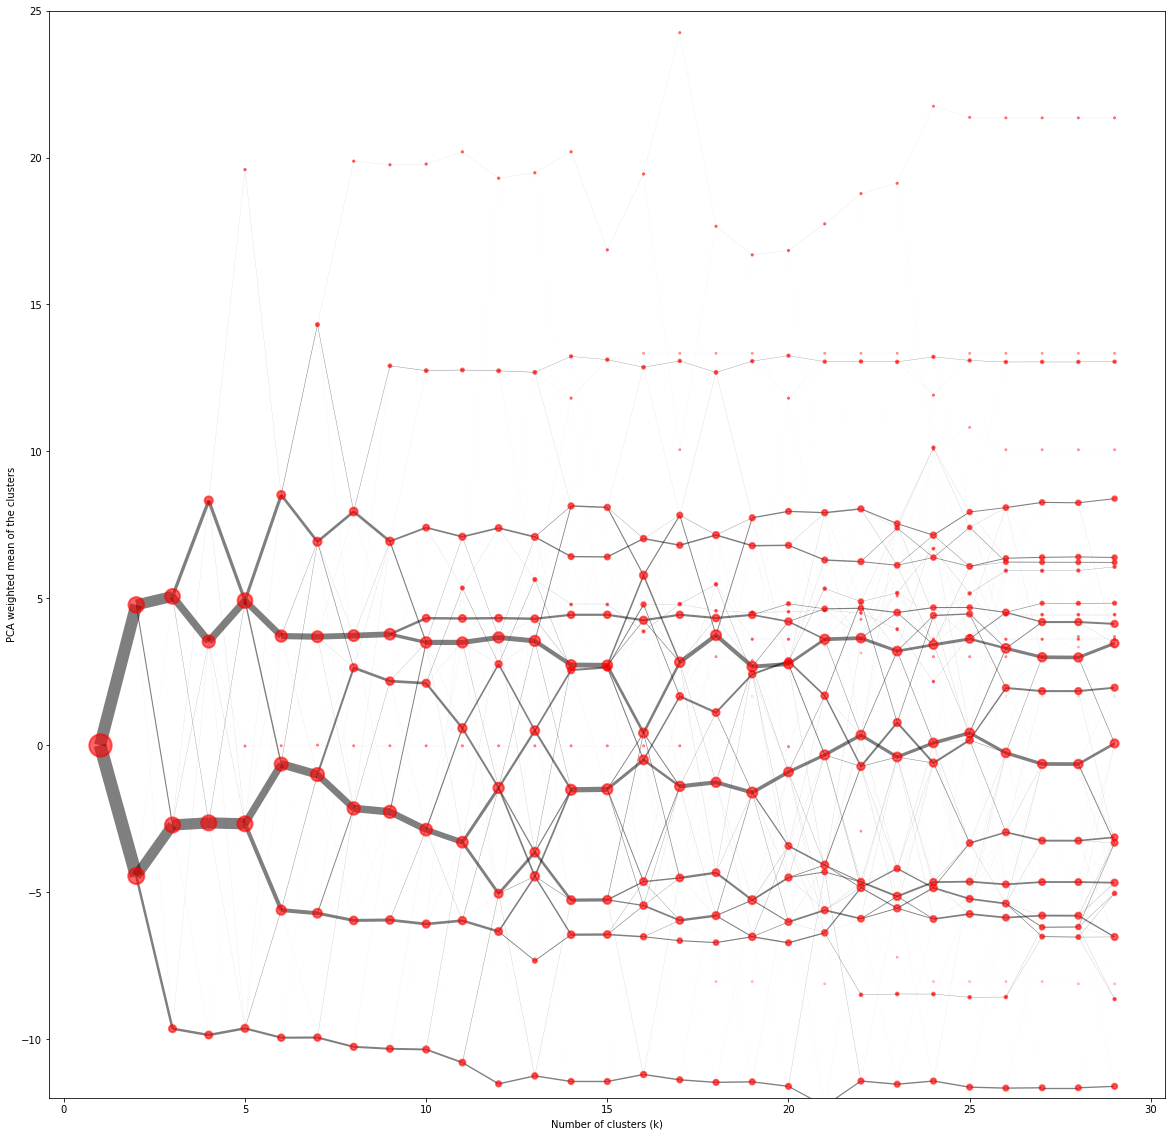

In [27]:
ax = cg_ss.plot(figsize=(20, 20), linewidth=0.5, cluster_style={"edgecolor": "r", "alpha":.6}, size=1,
       line_style={"alpha":.5})
ax.set_ylim(-12, 25)

In [28]:
tess = gpd.read_parquet(folder + "tess.pq", columns=['tessellation', 'buildings', 'tID'])

<AxesSubplot:>

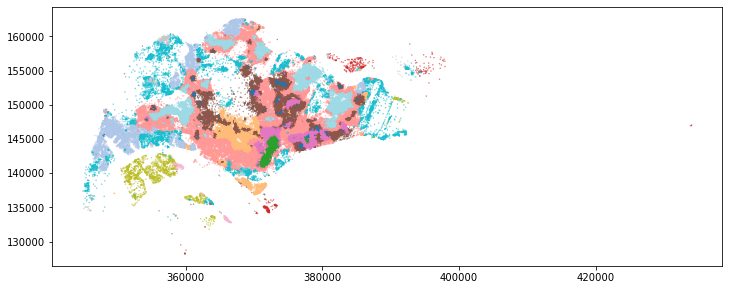

In [33]:
tess.set_geometry(tess.centroid).plot(cg_ss.labels[14], cmap="tab20", figsize=(12, 12), markersize=.1)